# Chebyshev級数

Chebyshev級数とは、cosine Fourier級数に対し変換 $x=\cos\theta$ を与えたものである。

$T_n (x):=\cos(n\theta)$, $\theta=\arccos(x)$ ( $n$ 次の第一種Chebyshev多項式)を基底とした級数展開

$$ f(x)=\sum_{n=0}^{\infty}a_n T_n(x), \quad x\in[-1,1] $$

をChebyshev級数という。これは変換 $x=\cos\theta$ と $T_n(x)$ の定義から

$$ f(\cos\theta)=\sum_{n=0}^{\infty}a_n \cos(n\theta),\quad \theta\in[0,2\pi] $$

となるため, $f(\cos\theta)$ という周期関数のFourier cosine級数である（係数の収束もフーリエ級数と同じ）。

Chebyshev係数 $(a_n)_{n\ge 0}$ は

$$ a_n=
\begin{cases}
\displaystyle{\frac{1}{\pi} \int^{1}_{-1}\frac{f(x)T_0(x)}{\sqrt{1-x^2}}dx}, & n=0\\[2mm]
\displaystyle{\frac{2}{\pi} \int^{1}_{-1}\frac{f(x)T_n(x)}{\sqrt{1-x^2}}dx}, & n>0
\end{cases}
$$

で与えられる。 この係数 $(a_n)$ をTwo-sided Chebyshev係数とよぶことがある。

**例**　$ T_n(x)=\cos n\theta$ なので $\cos0=1$, $\cos 1\theta=\cos\theta$, $\cos2\theta=2\cos^2\theta-1$, $\cos3\theta=4\cos^3\theta-3\cos\theta$, $\cos4\theta=8\cos^4\theta-8\cos^2\theta+1,...$ となる。これから

\begin{align*}
T_0(x)&=1 \\
T_1(x)&=x \\
T_2(x)&=2x^2-1 \\
T_3(x)&=4x^3-3x \\
T_4(x)&=8x^4-8x^2+1\\
&~\vdots
\end{align*}

という関係式を得ることができる。

Chebyshev多項式のもう一つの表現方法として、$|z|=1$ をみたす複素平面の単位円上で定義される複素変数 $z$ を用いる方法がある。いま

$$
F(z)\equiv f(x),\quad x=\frac{z+z^{-1}}{2}
$$

をみたすような複素関数 $F$ を考える。変換 $x=(z+z^{-1})/2$ は $x$ の1つの値に対して $z$ の2つの値 ($z$, $z^{-1}$) を対応させる。すなわち$F$ は $F(z)=F(z^{-1})$ の対称性が成り立つ。関数 $F$ のLaurent展開を考えると


$$ F(z) = F(z^{-1}) = \frac{1}{2}\sum_{n=0}^{\infty}a_n\left(z^{n}+z^{-n}\right), \quad |z| = 1.$$

よって $n$ 番目の Chebyshev 多項式 $T_n$ は、単位円上の変数 $z^{n}$ の実部で定義できて

$$ T_n\left(x\right) = \frac{1}{2}\left(z^{n}+z^{-n}\right),\quad n\ge 0 $$

と表すことができる。この表現方法は Chebyshev 多項式がみたす漸化式を簡潔に導くことを助けてくれる。
任意の $n \geq 1$ について

$$
\frac{1}{2}\left(z+z^{-1}\right)\left(z^{n}+z^{-n}\right)=
\frac{1}{2}\left(z^{n+1}+z^{-n-1}\right)+\frac{1}{2}\left(z^{n-1}+z^{-n+1}\right)
$$

が成り立つので、以下のような漸化式を得る。

$$
2xT_n\left(x\right) = T_{n+1}(x)+T_{n-1}(x)
\iff T_{n+1}\left(x\right) = 2xT_{n}\left(x\right)-T_{n-1}\left(x\right)
$$

この漸化式と $T_0(x)=1$, $T_1(x) = x$ という条件から、$T_n(x)$ を具体的に求めることができる。


$T_0(x)$ から $T_5(x)$ までを図示すると次のようになる。

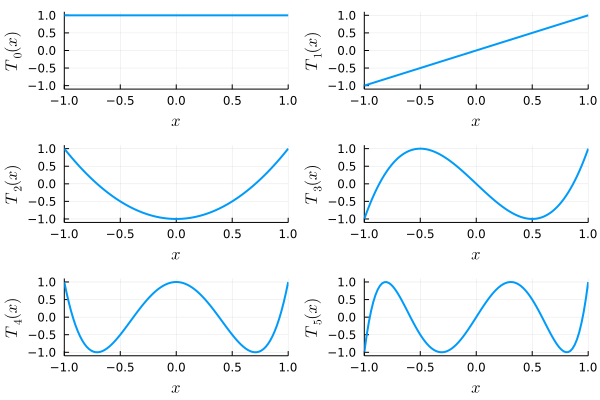

In [1]:
using ApproxFun, Polynomials, Plots

function T(n)
    return ChebyshevT([zeros(n);1.])
end

plot(
    plot(T(0), ylabel = "\$T_0(x)\$"),
    plot(T(1), ylabel = "\$T_1(x)\$"),
    plot(T(2), ylabel = "\$T_2(x)\$"),
    plot(T(3), ylabel = "\$T_3(x)\$"),
    plot(T(4), ylabel = "\$T_4(x)\$"),
    plot(T(5), ylabel = "\$T_5(x)\$"),
    layout    = (3, 2),
    line        = 2,
    color      = 2, 
    xlabel = "\$x\$",
    xlims      = (-1, 1),
    ylims      = (-1.1, 1.1),
    legend   = false
)


一般の定義域 $x\in[a,b]$ 上でのChebyshev多項式は

$$[a,b]\rightarrow [-1,1],\quad x\mapsto \xi=2\frac{x-a}{b-a}-1$$

$$ [-1,1]\rightarrow[a,b],\quad \xi\mapsto x=\frac{1-\xi}{2}a+\frac{1+\xi}{2}b$$

という変換を使う。

<!--
あとで一般の定義域での構成方法を説明する？
-->

### Chebyshev級数の特徴1：対称性

上のプロットした図から明らかな通り、$T_n(x)$ は $n$ が偶数番目のとき偶関数、奇数番目の時奇関数となる。したがって、次の対称性が成り立つ。


- $f(x)=f(-x)$ (偶関数)の場合, $a_n$の偶数番目($\cos(2n\theta)$, $n=0,1,...$) だけ必要。
- $f(x)=-f(-x)$ (奇関数)の場合, $a_n$の奇数番目($\cos((2n-1)\theta)$, $n=1,2,...$) だけ必要。


### Chebyshev級数の特徴2：Chebyshev点

$$ x_j=\cos(j\pi/n),\quad0\leq j\leq n $$

という点を( $n$ 次Chebyshev多項式の)Chebyshev(-Lobatto)点という.
複素平面上の単位円の円周を等分割した点 $z_j=\exp(i\theta_j)$ ($\theta_j=j\pi/n$) とその実数部分 $x_j=\mathrm{Re}[z_j]$ の対応を以下に示す。 まず上半円上に $z_j$ をプロットすると

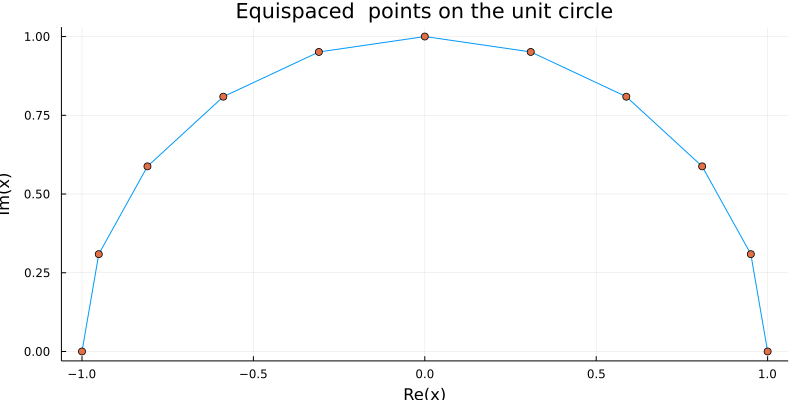

In [5]:
n = 10
tt= range(0,stop=π,length=n+1)
zz =exp.(im*tt)
using Plots
plot(zz,
    title = "Equispaced  points on the unit circle",
    legend = false, size = (800,400),
)
scatter!(zz)

そして、各Chebyshev点を計算し、上のプロットに重ね合わせると各 $z_j$ の実部に対応していることが分かる。

In [3]:
function chebpts(n, a=-1, b=1) # n: maximum order of Chebyshev polynomials
    tt = range(0, stop=π, length=n+1)
    x = cos.(tt)
    return (1.0 .- x).*a/2 + (1.0 .+ x).*b/2
end

chebpts (generic function with 3 methods)

In [6]:
x = chebpts(n)
for j = 2:n
    plot!([x[j];zz[j]],
        title = "Chebyshev points",
        legend = false,
        color=1,
    )
end
scatter!(x.+0*im)
# savefig("chebpts.pdf")

さらにChebyshev多項式を重ねてみると、Chebyshev多項式の性質が見える。

In [8]:
Tₙ = Fun(Chebyshev(),[zeros(n);1.])
plot!(Tₙ, -1,1, color=2,line= 1.6,)
# savefig("cheb_maxima.pdf")

すなわちChebyshev点においてChebyshev多項式は極値( $\pm 1$ )を取る。

### Chebyshev級数の特徴3：Fourier級数との関係

Chebyshev級数はFourier級数への変換が容易である。

$$
\begin{align*}
f(x)&=c_0+2\sum^{\infty}_{n=1}c_nT_n(x) \\
&= c_0+2\sum^{\infty}_{n=1}c_n\cos(n\theta),\quad (x=\cos\theta)\\
&= \sum^{\infty}_{k=-\infty}c_{|k|}e^{ik\theta}\\
\end{align*}
$$

ここで

$$
\begin{align*}
c_k = \frac{1}{2\pi}\int_0^{2\pi} f(\cos\theta) e^{-i k\theta}d\theta\quad(k\in \mathbb{Z}) && (c_{-k}=c_k)
\end{align*}
$$

が成り立つため、Fourier 係数 $c_{|k|}$ は計算できる。 この $(c_n)_{n\ge 0}$ を One-sided Chebyshev 係数とよぶことがある。
もう少し詳しく言うと、$|k|<M$ の範囲で打ち切った Chebyshev 係数 $c_k$ は離散フーリエ変換を用いて

$$
	c_k \approx  \frac1{2M-2}\sum_{j=0}^{2M-3} f(\cos\theta_j) e^{-\pi i\frac{kj}{M-1}}=\bar{c}_k\quad \left(\theta_j=\frac{\pi j}{M-1},~h=\frac{\pi}{M-1},~|k|<M\right)
$$

と近似できる。ここで $f(\cos\theta_j)$ はChebyshev点 $x_j=\cos\theta_j$ における関数 $f$ の値を表す。


### Chebyshev係数の計算方法
試しに $f(x)=\exp\left(\mathop{\mathrm{erf}}(x^2)+x^5\right)\sin(3\pi x) + x$ ($x\in[-1,1]$) のChebyshev係数を計算するコードを以下に載せる。

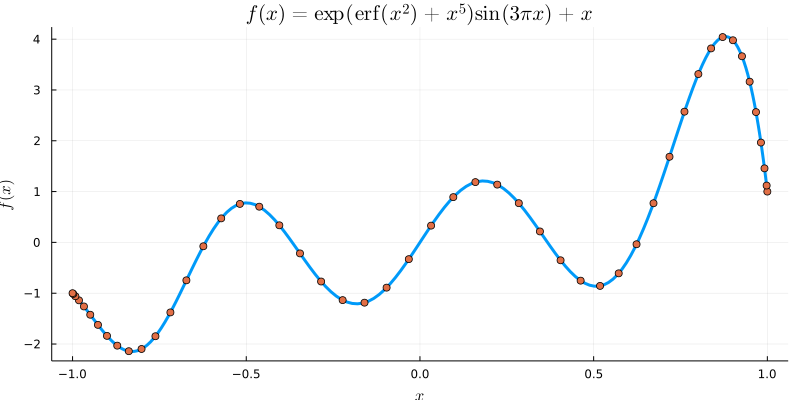

In [15]:
using SpecialFunctions
M =  50 # number of Chebyshev polynimals
fc = Fun(x->exp(erf(x^2)+x.^5).*sin(3*pi*x) + x, Chebyshev(), M)
n = ncoefficients(fc) - 1 # maximum order of Chebyshev polynomials (n = M-1)

plot(fc,
    xlabel     = "\$x\$",
    ylabel     = "\$f(x)\$",
    line       = 3,
    title      = "\$f(x) = \\exp\\,(\\mathrm{erf}\\,(x^2)+x^5)\\sin\\,(3\\pi x) + x\$", 
    size       = (800,400),
    legend     = false,
)

cpts = chebpts(n)
fvals = fc.(cpts)
scatter!(cpts,fvals)
# savefig("ex_func.pdf")

Chebyshev点における関数値からChebyshev係数を計算する方法は以下の通りになる。出力結果から`ApproxFun.jl`で計算したチェビシェフ係数と一致することが確認できる。

In [13]:
using FFTW
FourierCoeffs = real(fftshift(fft([fvals;reverse(fvals[2:end-1])])))/(2M-2)
Cheb_onesided = reverse(FourierCoeffs[1:M])
Cheb_twosided = similar(Cheb_onesided)
Cheb_twosided[1] = Cheb_onesided[1]
Cheb_twosided[end] = Cheb_onesided[end]
Cheb_twosided[2:end-1] = 2*Cheb_onesided[2:end-1]
reshape([coefficients(fc);Cheb_twosided],M,2)

50×2 Matrix{Float64}:
  0.287573      0.287573
  1.93311       1.93311
  0.364321      0.364321
  0.356239      0.356239
 -0.0820947    -0.0820947
 -0.688727     -0.688727
 -0.34171      -0.34171
 -1.00735      -1.00735
 -0.229165     -0.229165
  0.520943      0.520943
 -0.0247779    -0.0247779
 -0.116649     -0.116649
  0.0263973     0.0263973
  ⋮            
 -5.42512e-12  -5.42513e-12
  9.31526e-12   9.31531e-12
 -4.55051e-12  -4.55056e-12
  1.0937e-12    1.09386e-12
  1.31131e-13   1.31305e-13
 -2.5512e-13   -2.55197e-13
  1.23554e-13   1.23444e-13
 -2.9825e-14   -2.95954e-14
 -3.37508e-15  -3.6197e-15
  6.08402e-15   6.03599e-15
 -3.48166e-15  -3.14941e-15
  5.32907e-16   6.16287e-16

一方で、上記のコードは理解のために添字の入れ替えや離散フーリエ変換のスケールの計算部分で無駄な計算をしているので、以下のようにシンプルにコードを書き直す。

In [14]:
valsUnitDisc = [fvals;reverse(fvals[2:end-1])]
FourierCoeffs = real(fft(valsUnitDisc))
ChebCoeffs = FourierCoeffs[1:n+1]/n
ChebCoeffs[1] = ChebCoeffs[1]/2
ChebCoeffs[end] = ChebCoeffs[end]/2
reshape([ChebCoeffs; Cheb_twosided],n+1,2)

50×2 Matrix{Float64}:
  0.287573      0.287573
  1.93311       1.93311
  0.364321      0.364321
  0.356239      0.356239
 -0.0820947    -0.0820947
 -0.688727     -0.688727
 -0.34171      -0.34171
 -1.00735      -1.00735
 -0.229165     -0.229165
  0.520943      0.520943
 -0.0247779    -0.0247779
 -0.116649     -0.116649
  0.0263973     0.0263973
  ⋮            
 -5.42513e-12  -5.42513e-12
  9.31532e-12   9.31531e-12
 -4.55054e-12  -4.55056e-12
  1.09376e-12   1.09386e-12
  1.31305e-13   1.31305e-13
 -2.55127e-13  -2.55197e-13
  1.23457e-13   1.23444e-13
 -2.95908e-14  -2.95954e-14
 -3.62012e-15  -3.6197e-15
  6.0813e-15    6.03599e-15
 -3.14488e-15  -3.14941e-15
  6.16287e-16   6.16287e-16

以上の計算方法を関数の形でまとめると以下のようになる。

In [19]:
function chebcoeffs(f,M,I=[-1,1])
    a = I[1]; b = I[2]
    n = M-1
    cpts  = chebpts(n, a, b)
    fvals = f.(cpts)
    FourierCoeffs = real(fft([fvals;reverse(fvals[2:end-1])]))
    ChebCoeffs = FourierCoeffs[1:n+1]/n
    ChebCoeffs[1] = ChebCoeffs[1]/2
    ChebCoeffs[end] = ChebCoeffs[end]/2
    return ChebCoeffs # return Two-sided Chebyshev
end

chebcoeffs (generic function with 2 methods)

上に示したのは関数 $f$ とChebyshev多項式の数 $M$ を与えると (Two-sided) Chebyshev係数の値を出力するコードである。
一方で、関数の十分な近似を得られる $M$ の値は近似する関数によって異なり、適切な多項式の数 $M$ を決めることは自明ではない。そこで適切な $M$ を見つけて Chebyshev 係数を計算する方法を以下では考える。

まず、上で定義した `chebfoeffs` 関数を用いると与えた関数（例えば $f(x) = e^x$）に対してChebyshev多項式の数 $M$ を指定して、Chebyshev 係数を計算することができる。

In [20]:
f(x) = exp(x)
chebcoeffs(f,2^3+1) # M=9として計算

9-element Vector{Float64}:
 1.2660658777520082
 1.13031820798497
 0.27149533953407795
 0.04433684984870376
 0.005474240443132938
 0.0005429263368934845
 4.497787354390548e-5
 3.2094732340670618e-6
 1.9921248062271246e-7

得られた Chebyshev 係数の末尾に注目して、末尾が十分小さければ、関数の良い近似が得られたと判断できる。サイズ $M$ が十分大きければ、Chebyshev係数は十分小さな値に収束していくことが予想されるが、いま 8次の Chebyshev 多項式(M=9)を用いてChebyshev係数の末尾を見ると、約 $10^{-7}$ 程度までしか小さくなっていない。これでは係数が十分に小さいとは言えないため、$M$ を増やして再度計算する。Chebyshev 係数の末尾が単位相対丸め ($2^{-52}$) と同程度に低下するまで $M$ を17、33、65 ($2^i+1$, $i=3,4,\dots$)というように増やす。

In [14]:
chebcoeffs(f,2^4+1)

17-element Vector{Float64}:
  1.2660658777520082
  1.13031820798497
  0.27149533953407656
  0.04433684984866383
  0.005474240442093689
  0.0005429263119138619
  4.497732295428991e-5
  3.1984364623482975e-6
  1.9921248062271246e-7
  1.1036771718764271e-8
  5.505896155666434e-10
  2.49796225371135e-11
  1.0392494156907794e-12
  3.9929864970034146e-14
  1.4155343563970746e-15
 -1.1102230246251565e-16
 -1.1102230246251565e-16

$f(x) = e^x$ の場合、$M=17$ でChebyshev係数が $10^{-15}$ 程度まで低下したと判断された。以下の`cheb`関数は、$M$ を$3,5,9,17,33\dots$ と増やしていき、Chebushev係数の末尾が$10^{-15}$を下回るようMを設定しChebyshev係数を計算する。

In [21]:
function cheb(f,I=[-1;1];tol = 5e-15,Nmax = 10000)
    a = I[1]; b = I[2]; m = 0.5*(a+b); r = 0.5*(b-a); x = rand(5)
    x1 = m .+ x*r; x2 = m .- x*r
    if f.(x1) ≈ f.(x2)
        odd_even = 1 # even function: 1
    elseif f.(x1) ≈ -f.(x2)
        odd_even = -1 #  odd function: -1
    else
        odd_even = 0 # otherwise: 0
    end
    i = 3
    schbc = 0 # sampling chebyshev coefficients
    while true
        schbc = chebcoeffs(f,2^i+1,I)
        if all(abs.(schbc[end-2:end]) .< tol) || (2^i+1 > Nmax) # 最大項数いくつが良いかわからん
            break
        end
        i += 1
    end    
    M = findlast(abs.(schbc) .> tol)
    cc = chebcoeffs(f,M,I)
    if odd_even == 1 # even function
        cc[2:2:end] .= 0
    elseif odd_even == -1 # odd function
        cc[1:2:end] .= 0
    end
    return cc # return Two-sided Chebyshev
end

cheb (generic function with 4 methods)

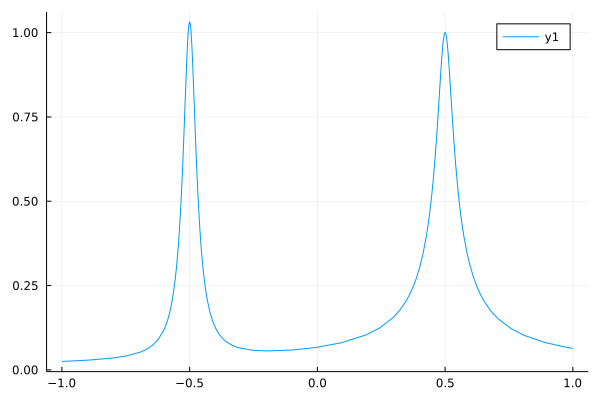

In [22]:
f(x) = 1/(1+1000*(x+.5).^2)+1/sqrt(1+1000*(x-.5).^2)
plot(f,-1,1)

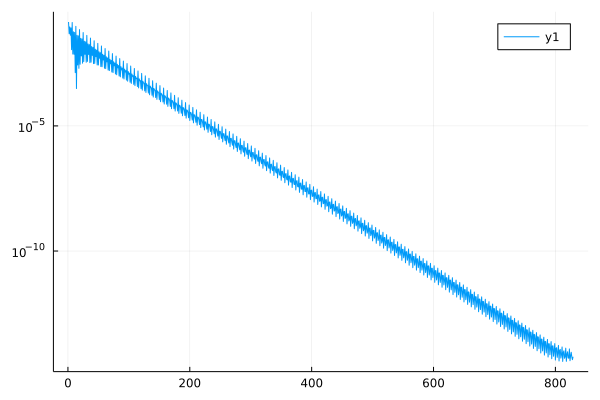

In [25]:
# cheb(f)
plot(abs.(cheb(f)),yscale=:log10)

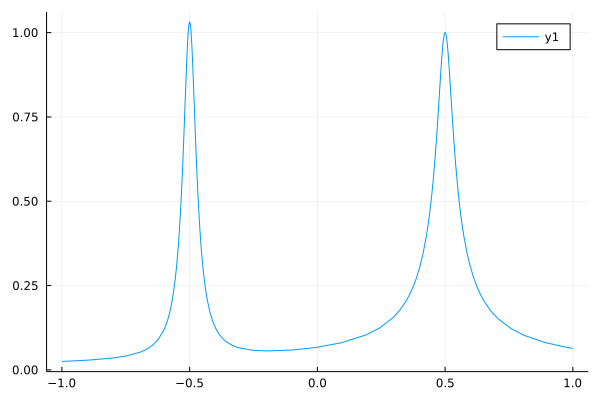

In [114]:
# g(x) = exp(x)
# g(x) = 1/(x^3+9x^2+x+7)
# g(x) = sin(6x) + sin(60*exp(x))
g(x) = 1/(1+1000*(x+0.5)^2) + 1/sqrt(1+1000*(x-0.5)^2)
plot(g,-1,1)

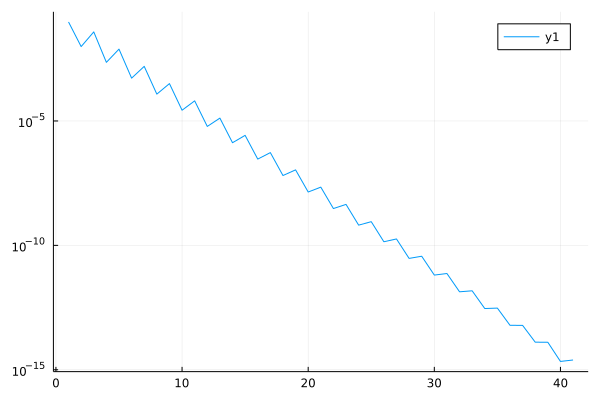

In [113]:
# cheb(g)
plot(abs.(cheb(g,[-1,1],2e-15)),yscale=:log10)

### Chebyshev係数から元の関数の概形を求める

  0.076497 seconds (312.47 k allocations: 20.362 MiB, 95.53% compilation time)


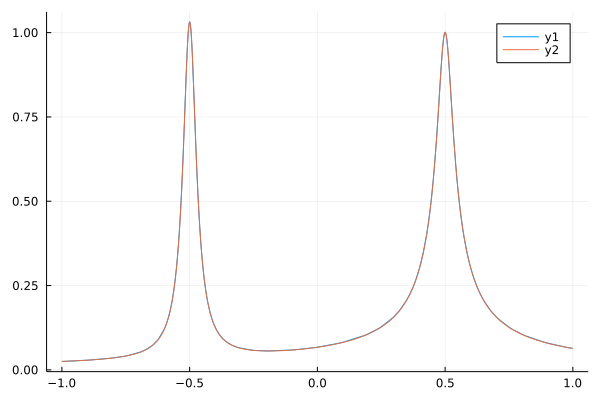

In [115]:
a = cheb(g);
@time plot_cheb(a)

In [112]:
function plot_cheb(ChebCoeffs_twosided,I=[-1,1]) # Input: Two-sided Chebyshev
    M = length(ChebCoeffs_twosided) # M: size of chebyshev
    a = I[1]; b = I[2]
    ChebCoeffs_twosided[2:end] *= 0.5 # Two-sided -> One-sided
    FourierCoeffs = [reverse(ChebCoeffs_twosided[2:end]);ChebCoeffs_twosided]
    m_pad = 10000 # needs a sufficiently large padding (気持ち悪い)
    a_pad = [zeros(m_pad);FourierCoeffs;zeros(m_pad)]
    N_pad = M + m_pad
    dx = 2.0π/(2N_pad-1)
    θⱼ = dx*(N_pad:(2N_pad-1))
    ξⱼ = cos.(θⱼ)
    xⱼ = (1.0 .- ξⱼ)*a/2 + (1.0 .+ ξⱼ)*b/2 
    fⱼ = real((2*N_pad-1)*ifft(ifftshift(a_pad)))
    plot!(xⱼ, fⱼ[N_pad:end])
end

plot_cheb (generic function with 2 methods)

In [78]:
Vector(0.01*(1:10))

10-element Vector{Float64}:
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 0.1

In [37]:
cc =cheb(f)
function plot_solution(cc)

LoadError: syntax: incomplete: premature end of input